In [1]:
import os
os.chdir('../')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scr.util import *

# Gradient Boosting Dicision Tree

In [74]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [75]:
# 目的変数

df_train['ProdTaken'].value_counts()

ProdTaken
0    2992
1     497
Name: count, dtype: int64

In [76]:
df_train.isna().sum()

id                          0
Age                       100
TypeofContact               6
CityTier                    0
DurationOfPitch           121
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups          33
ProductPitched              0
PreferredPropertyStar       0
NumberOfTrips              22
Passport                    0
PitchSatisfactionScore      0
Designation                 0
MonthlyIncome              56
customer_info               0
ProdTaken                   0
dtype: int64

In [77]:
df_test.isna().sum()

id                          0
Age                        93
TypeofContact              12
CityTier                    0
DurationOfPitch           131
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups          24
ProductPitched              0
PreferredPropertyStar       0
NumberOfTrips              42
Passport                    0
PitchSatisfactionScore      0
Designation                 0
MonthlyIncome              49
customer_info               0
dtype: int64

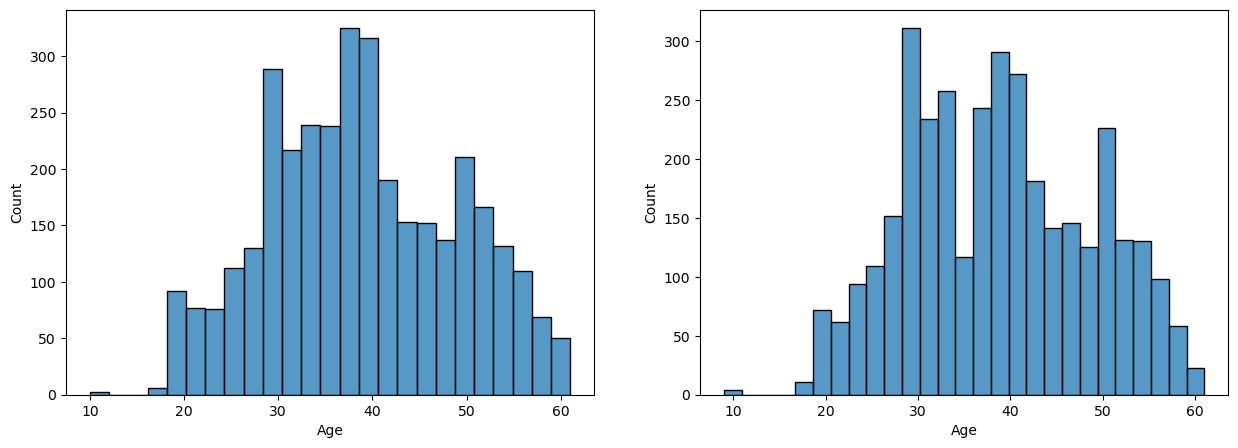

In [78]:
# Age Normalization
# 年齢

df_train['Age'] = df_train['Age'].astype(str).apply(japanese_to_int)
df_test['Age'] = df_test['Age'].astype(str).apply(japanese_to_int)

tmp = df_train[~(df_train['Age'] == 0)]
df_train.loc[df_train['Age'] == 0, 'Age'] = tmp['Age'].median()

tmp = df_test[~(df_test['Age'] == 0)]
df_test.loc[df_test['Age'] == 0, 'Age'] = tmp['Age'].median()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_list = [df_train, df_test]
for i, df in enumerate(df_list):
    sns.histplot(df['Age'], ax=axes[i])

In [79]:
# TypeofContact Normalization
# 顧客への連絡・接触方法
# 欠損値意味アリ

print('Train', df_train['TypeofContact'].unique())
print('Test', df_test['TypeofContact'].unique())
display(df_train.groupby(by=['TypeofContact'])['ProdTaken'].agg(['mean', ('count')]))

Train ['Self Enquiry' 'Company Invited' nan]
Test ['Self Enquiry' 'Company Invited' nan]


,mean,count
TypeofContact,,
Company Invited,0.182312,1289
Self Enquiry,0.119417,2194


In [80]:
# CityTier Normalization
# 都市層(1>2>3)

print('Train', df_train['CityTier'].unique())
print('Test', df_test['CityTier'].unique())
display(df_train.groupby(by=['CityTier'])['ProdTaken'].agg(['mean', 'count']))

Train [2 1 3]
Test [2 1 3]


,mean,count
CityTier,,
1,0.111864,1475
2,0.168546,1596
3,0.150718,418


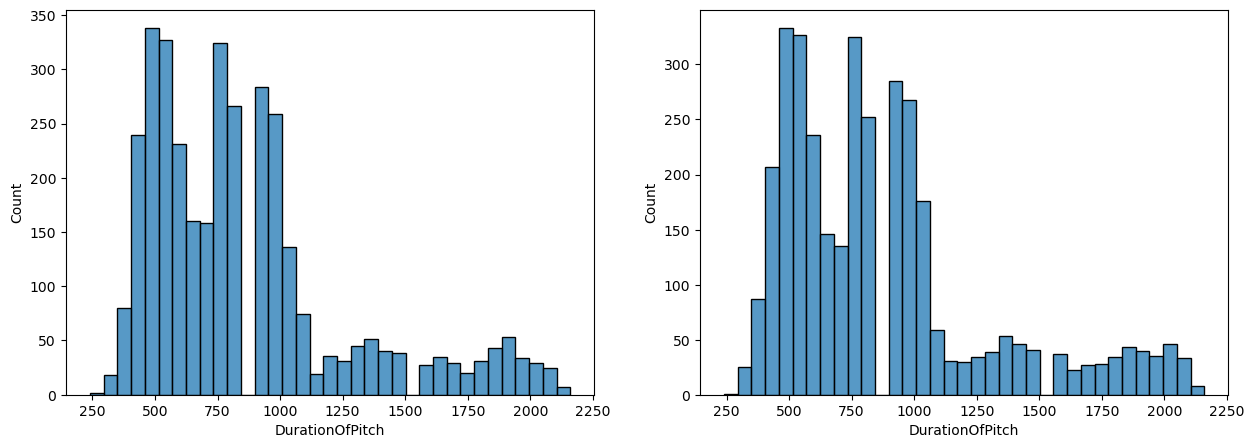

In [81]:
# DurationOfPitch Normalization
# 営業担当者による顧客への商品セールス時間

df_train['DurationOfPitch'] = df_train['DurationOfPitch'].dropna().apply(convert_to_second)
df_test['DurationOfPitch'] = df_test['DurationOfPitch'].dropna().apply(convert_to_second)

df_train['DurationOfPitch'] = df_train['DurationOfPitch'].fillna(df_train['DurationOfPitch'].median())
df_test['DurationOfPitch'] = df_test['DurationOfPitch'].fillna(df_test['DurationOfPitch'].median())

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
df_list = [df_train, df_test]
for i, df in enumerate(df_list):
    sns.histplot(df['DurationOfPitch'], ax=axes[i])

In [82]:
# Occupation Normalization
# 顧客の職業

print('Train', df_train['Occupation'].unique())
print('Test', df_test['Occupation'].unique())
display(df_train.groupby(by=['Occupation'])['ProdTaken'].agg(['mean', 'count']))

Train ['Large Business' 'Salaried' 'Small Business']
Test ['Small Business' 'Salaried' 'Large Business']


,mean,count
Occupation,,
Large Business,0.227147,361
Salaried,0.102070,1401
Small Business,0.157499,1727


In [89]:
# Gender Normalization
# 顧客の性別

df_train['Gender'] = df_train['Gender'].apply(normalize_gender)
df_test['Gender'] = df_test['Gender'].apply(normalize_gender)


display(df_train.groupby(by=['Gender'])['ProdTaken'].agg(['mean', 'count']))

,mean,count
Gender,,
female,0.109968,1264
male,0.160899,2225


In [94]:
# NumberOfPersonVisiting Normalization
# 予定している旅行の同行者の数

print('Train', df_train['NumberOfPersonVisiting'].unique())
print('Test', df_test['NumberOfPersonVisiting'].unique())
display(df_train.groupby(by=['NumberOfPersonVisiting'])['ProdTaken'].agg(['mean', 'count']))

Train [1. 2. 3. 4.]
Test [1. 2. 3. 4.]


,mean,count
NumberOfPersonVisiting,,
1.0,0.247024,336
2.0,0.152363,1608
3.0,0.115468,1377
4.0,0.059524,168


In [110]:
# NumberOfFollowups Normalization
# セールス後に営業担当者が行ったフォローアップの回数

df_train['NumberOfFollowups'] = df_train['NumberOfFollowups'].apply(lambda x: x if x < 100 else x / 100)
df_test['NumberOfFollowups'] = df_test['NumberOfFollowups'].apply(lambda x: x if x < 100 else x / 100)

display(df_train.groupby(by=['NumberOfFollowups'])['ProdTaken'].agg(['mean', 'count']))
display(df_train[df_train['NumberOfFollowups'].isna()]['ProdTaken'].value_counts())

# 欠損値意味アリ
df_train['NumberOfFollowups'] = df_train['NumberOfFollowups'].fillna(0)
df_test['NumberOfFollowups'] = df_test['NumberOfFollowups'].fillna(0)

display(df_train.groupby(by=['NumberOfFollowups'])['ProdTaken'].agg(['mean', 'count']))

,mean,count
NumberOfFollowups,,
1.0,0.128205,78
2.0,0.055556,108
3.0,0.166667,1296
4.0,0.133948,1411
5.0,0.114504,524
6.0,0.358974,39


ProdTaken
0    31
1     2
Name: count, dtype: int64

,mean,count
NumberOfFollowups,,
0.0,0.060606,33
1.0,0.128205,78
2.0,0.055556,108
3.0,0.166667,1296
4.0,0.133948,1411
5.0,0.114504,524
6.0,0.358974,39


In [113]:
# ProductPitched Normalization
# 営業担当者のセールスした商品の種類

# Feature Engineering